In [1]:
import os
import glob

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(17)

Dataset [CICIDS 2017](https://www.kaggle.com/datasets/cicdataset/cicids2017) 

In [3]:
DATA_PATH = '/home/churilov/data/other/Mephi/CICIDS_2017/MachineLearningCSV/MachineLearningCVE'

In [4]:
all_files = glob.glob(os.path.join(DATA_PATH, "*.csv"))
all_files

['/home/churilov/data/other/Mephi/CICIDS_2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
 '/home/churilov/data/other/Mephi/CICIDS_2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
 '/home/churilov/data/other/Mephi/CICIDS_2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv',
 '/home/churilov/data/other/Mephi/CICIDS_2017/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv',
 '/home/churilov/data/other/Mephi/CICIDS_2017/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
 '/home/churilov/data/other/Mephi/CICIDS_2017/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
 '/home/churilov/data/other/Mephi/CICIDS_2017/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv',
 '/home/churilov/data/other/Mephi/CICIDS_2017/MachineLearningCSV/Machi

In [5]:
df_from_each_file = (pd.read_csv(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [6]:
anomaly_cols = ['DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed']

anomaly_cols_map = {col:1 for col in anomaly_cols}
anomaly_cols_map['BENIGN'] = 0

df[' Label'] = df[' Label'].map(anomaly_cols_map)

In [7]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df)
X, y = df.drop(' Label', axis=1), df[' Label']

In [8]:
scaler = StandardScaler()
train_X = scaler.fit_transform(X.select_dtypes(include=['float64', 'float32','float16','int32','int16','int8']))

In [9]:
X_train,X_test,y_train,y_test = train_test_split(train_X, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
# define dataset

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)
importance = model.coef_[0]

/home/churilov/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))


In [13]:
df.drop(' Label', axis=1).shape

(2827876, 78)

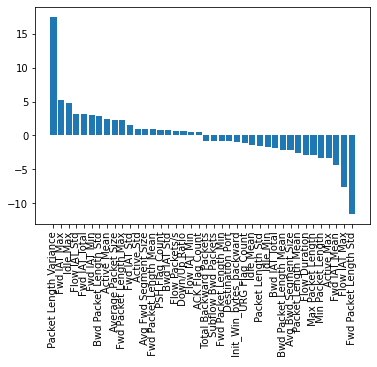

In [69]:
n_top = 20
cols = df.drop(' Label', axis=1).columns

assert n_top < len(cols)//2 

sorted_features = sorted(list(zip(cols, importance)), key=lambda tup: tup[1], reverse=True)
top_features = sorted_features[:n_top] + sorted_features[-n_top:]

top_feature_names  = [k for (k,v) in top_features]
top_feature_scores  = [v for (k,v) in top_features]

plt.bar([x for x in range(len(top_features))],  top_feature_scores)
# plt.show()

plt.xticks(range(n_top*2), top_feature_names)
plt.xticks(rotation=90)
plt.show();

In [87]:
%%time

corr_matrix = df.drop([' Label'], axis=1).corr(method='pearson')

CPU times: user 38.8 s, sys: 1.21 s, total: 40 s
Wall time: 41 s


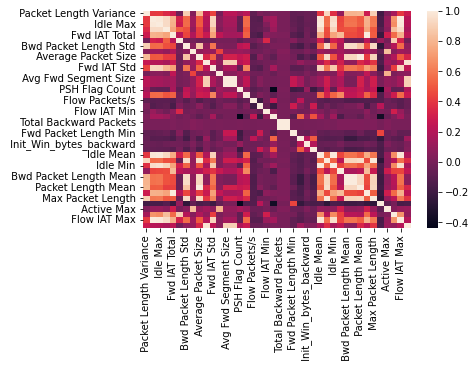

In [97]:
# sns.heatmap(corr_matrix);
sns.heatmap(corr_matrix.loc[top_feature_names, top_feature_names]);

In [99]:
upper = corr_matrix.abs().where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
correlated_cols = [column for column in upper.columns if any(upper[column] > 0.95)]
correlated_cols

[' Total Backward Packets',
 ' Total Length of Bwd Packets',
 ' Fwd Packet Length Std',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 'Fwd IAT Total',
 ' Fwd IAT Max',
 'Fwd Packets/s',
 ' Packet Length Std',
 ' SYN Flag Count',
 ' CWE Flag Count',
 ' ECE Flag Count',
 ' Average Packet Size',
 ' Avg Fwd Segment Size',
 ' Avg Bwd Segment Size',
 ' Fwd Header Length.1',
 'Subflow Fwd Packets',
 ' Subflow Fwd Bytes',
 ' Subflow Bwd Packets',
 ' Subflow Bwd Bytes',
 'Idle Mean',
 ' Idle Max',
 ' Idle Min']

In [101]:
pairs = []
for i in correlated_cols:
    for j in top_feature_names:
        if np.abs(corr_matrix.loc[i, j])>0.95:
            pairs.append(f'{i}-{j}')
            print(f'{i}-{j} {round(np.abs(corr_matrix.loc[i, j]), 3)}')
            
print(f'\ntotal pairs: {len(pairs)}')

 Total Backward Packets- Total Backward Packets 1.0
 Total Backward Packets- Subflow Bwd Packets 1.0
 Total Length of Bwd Packets- Total Backward Packets 0.994
 Total Length of Bwd Packets- Subflow Bwd Packets 0.994
 Fwd Packet Length Std- Fwd Packet Length Max 0.968
 Fwd Packet Length Std- Fwd Packet Length Std 1.0
 Bwd Packet Length Mean- Bwd Packet Length Mean 1.0
 Bwd Packet Length Mean- Avg Bwd Segment Size 1.0
 Bwd Packet Length Std- Bwd Packet Length Std 1.0
Fwd IAT Total-Fwd IAT Total 1.0
Fwd IAT Total- Flow Duration 0.999
 Fwd IAT Max- Fwd IAT Max 1.0
 Fwd IAT Max- Idle Max 0.988
 Fwd IAT Max-Idle Mean 0.978
 Fwd IAT Max- Flow IAT Max 0.998
Fwd Packets/s- Flow Packets/s 0.988
 Packet Length Std- Packet Length Std 1.0
 Packet Length Std- Max Packet Length 0.984
 Average Packet Size- Average Packet Size 1.0
 Average Packet Size- Packet Length Mean 0.998
 Avg Fwd Segment Size- Avg Fwd Segment Size 1.0
 Avg Fwd Segment Size- Fwd Packet Length Mean 1.0
 Avg Bwd Segment Size- Bwd Pa

In [121]:
cols_to_left = [
    ' Idle Max',
    'Idle Mean',
    ' Idle Max',
    ' Idle Min',
    ' Flow IAT Max',
    ' Fwd IAT Max',
    ' Avg Fwd Segment Size',
    ' Flow Duration',
    ' Flow Packets/s',
    ' Subflow Bwd Packets',
    ' Total Backward Packets',
    ' Fwd Packet Length Max',
    ' Subflow Bwd Packets',    
]

remain_cols = set(top_feature_names) - set(cols_to_left)
remain_cols.update(['Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Label'])
remain_cols

{' ACK Flag Count',
 ' Active Max',
 ' Active Std',
 ' Average Packet Size',
 ' Avg Bwd Segment Size',
 ' Bwd IAT Std',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 ' Destination Port',
 ' Down/Up Ratio',
 ' Flow IAT Min',
 ' Flow IAT Std',
 ' Fwd IAT Mean',
 ' Fwd IAT Min',
 ' Fwd IAT Std',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Min',
 ' Fwd Packet Length Std',
 ' Init_Win_bytes_backward',
 ' Max Packet Length',
 ' Min Packet Length',
 ' PSH Flag Count',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 ' Total Length of Bwd Packets',
 ' URG Flag Count',
 'Active Mean',
 'Bwd IAT Total',
 'Fwd IAT Total',
 'Total Length of Fwd Packets'}

#### Finaly, experiments have shown that quality is better if all features are used